In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df = df.drop(['Invoice ID', 'Date', 'Time'], axis = 1)

In [8]:
#cogs cost of goods sold
df['gross margin percentage'].unique()

array([4.76190476])

In [9]:
df = df.drop(['gross margin percentage'], axis = 1)

In [10]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3


### Data Visualization

In [11]:
print (df.shape)

(1000, 13)


<AxesSubplot:xlabel='Gender', ylabel='count'>

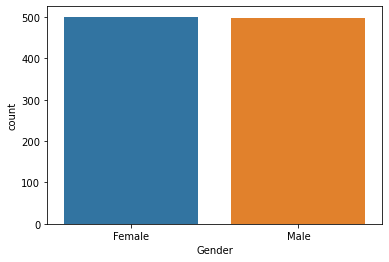

In [17]:
df['Gender'].value_counts()
sns.countplot(x ='Gender', data = df)

In [18]:
# creating dummies for gender columns

In [19]:
gender_dummies = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [20]:
# Joining gender dummies with original dataframe

In [21]:
df = pd.concat([df, gender_dummies], axis=1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


<AxesSubplot:xlabel='Product line', ylabel='Female'>

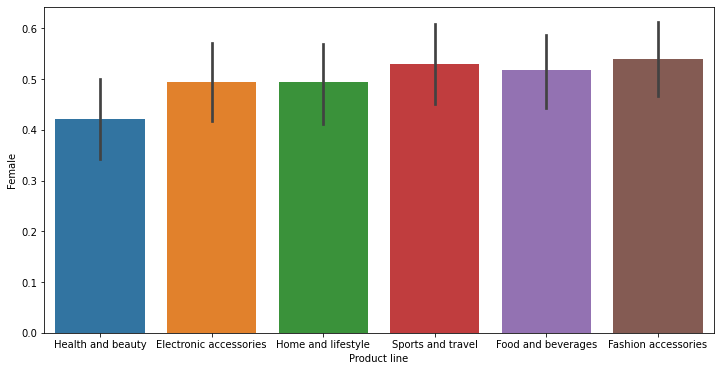

In [22]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Product line', y ='Female', data = df)

<AxesSubplot:xlabel='Product line', ylabel='Male'>

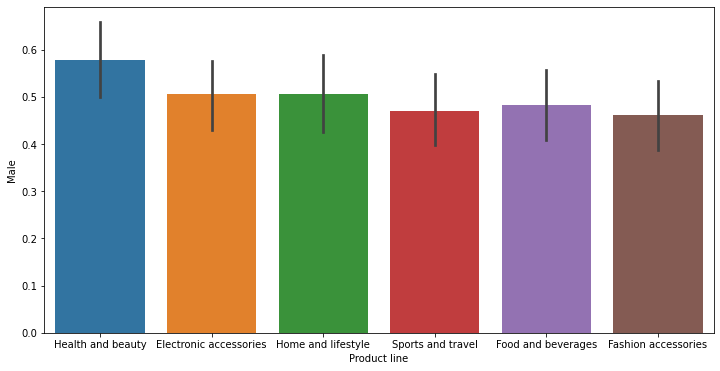

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'Product line', y = 'Male', data =df)

In [25]:
# Plotting customers per city

In [27]:
place_df = pd.DataFrame(df['City'].value_counts())
place_df

,City
Yangon,340
Mandalay,332
Naypyitaw,328


<AxesSubplot:ylabel='City'>

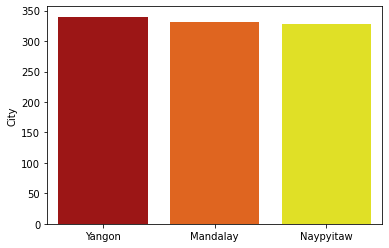

In [30]:
sns.barplot(x = place_df.index, y = place_df['City'], palette = 'hot')

In [31]:
# Plotting different payment method counts

In [32]:
payment_df = pd.DataFrame(df['Payment'].value_counts())
payment_df

,Payment
Ewallet,345
Cash,344
Credit card,311


<AxesSubplot:ylabel='Payment'>

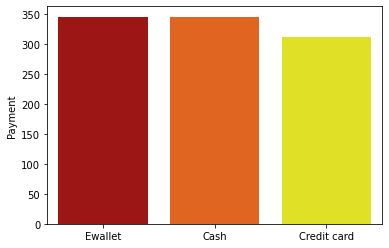

In [34]:
sns.barplot(x = payment_df.index, y = payment_df['Payment'], palette = 'hot')

In [35]:
# Getting gross income for each product line

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

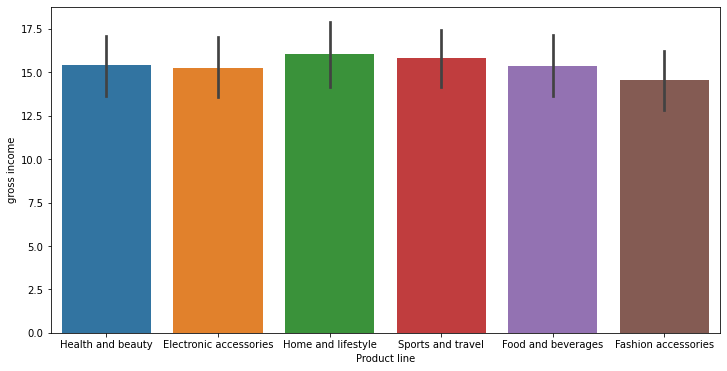

In [36]:
plt.figure(figsize = (12, 6))
sns.barplot(x= df['Product line'], y = df['gross income'])

In [37]:
# Getting rating plot for each product line

([<matplotlib.axis.XTick at 0x7f95319193a0>,
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

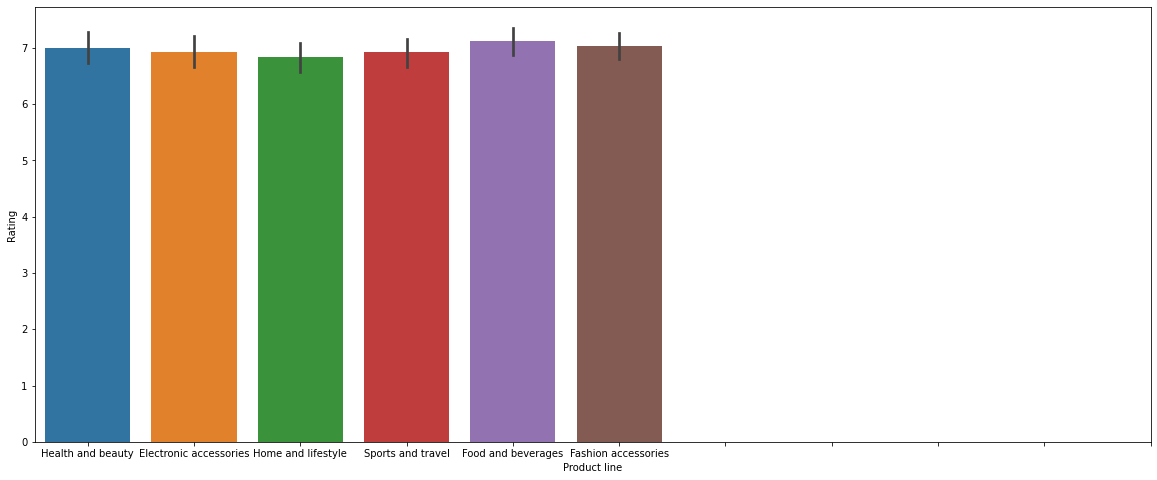

In [45]:
xdata = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize =(20, 8))
sns.barplot(x = df['Product line'], y = df['Rating'])
plt.xticks(xdata)

In [46]:
# Total bill in each product line

<AxesSubplot:xlabel='Total', ylabel='Product line'>

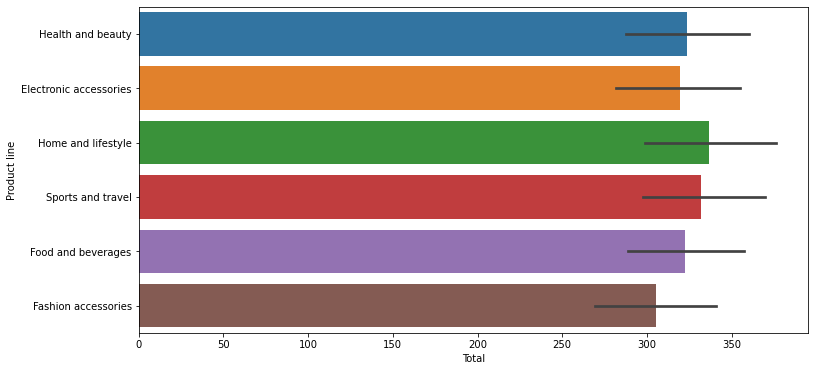

In [47]:
plt.figure(figsize =(12, 6))
sns.barplot(x = df['Total'], y = df['Product line'])

In [48]:
# Exploring quantity column

/Users/sunnypaul/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x7f94f3a0aca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

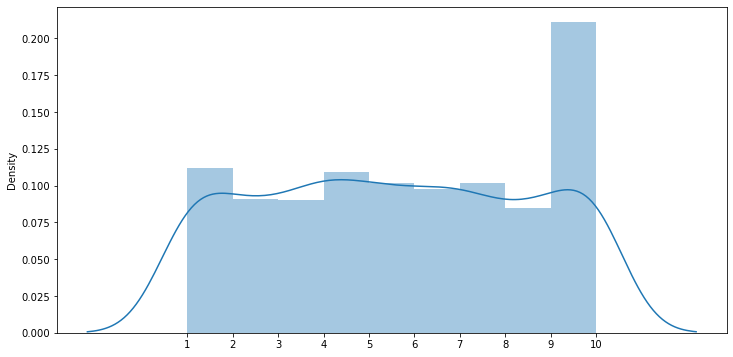

In [57]:
xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize = (12, 6))
sns.distplot(x = df['Quantity'])
plt.xticks(xdata)

In [58]:
quantity_df = pd.DataFrame(df['Quantity'].value_counts())
quantity_df

,Quantity
10,119
1,112
4,109
5,102
7,102
6,98
9,92
2,91
3,90
8,85


<AxesSubplot:ylabel='Quantity'>

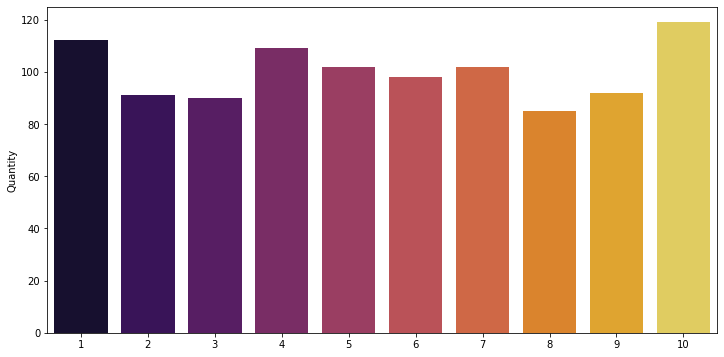

In [61]:
plt.figure(figsize = (12, 6))
sns.barplot(x = quantity_df.index, y = quantity_df['Quantity'], palette = 'inferno')

In [62]:
#plotting heatmap to check if any correction between columns

<AxesSubplot:>

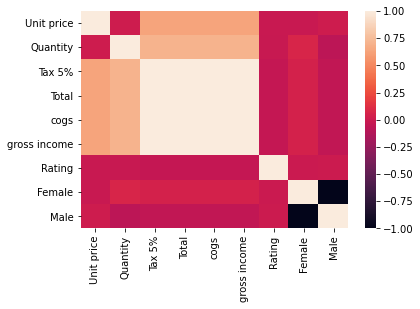

In [63]:
sns.heatmap(df.corr())

### Here is the simple analysis of a super shop sales.